In [1]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import myst_nb

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
#pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

## Example: Sale Prices for Houses

In this final section, we carry out an exploratory analysis using the ideas from this chapter to guide our investigations help us understand the visualizations that we make. Although EDA typically begins in the data wrangling stage, for demonstration purposes the data we work with in this section have already been partially cleaned so that we can focus on exploring the features of interest. 

**Scope.** These data were scraped from the San Francisco Chronicle (SFChron) Website. The SFChron published weekly data on the sale of houses in the San Francisco Bay Area. The data are a census of homes sold during this time. That is, the population consists of all sales of houses from Apr 2003 to December 2008. Since we are working with a census, the population matches the access frame and the sample consists of the entire population.

**Granularity.** Each record represents a sale of a home in the SF Bay Area during the above specified time period. This means that if a home was sold twice during this time, then it will have two records in the dataset. And, if a home in the Bay Area was not sold during this time, then it will not appear in the dataset.

**File Type.** When we inspect the data file sfhousing.csv with CLI tools (see Section X), we find that there are over 500,000 rows in the dataset and that the file indeed consists of comma-separated-values.



In [3]:
#The file has 521494 lines
!wc data/sfhousing.csv

  521494 2801383 47630469 data/sfhousing.csv


In [4]:
# The file is 45M large, which is reasonable to read into pandas
!du -shH data/sfhousing.csv

 45M	data/sfhousing.csv


In [5]:
!head -n 4 data/sfhousing.csv

county,city,zip,street,price,br,lsqft,bsqft,year,date,datesold
Alameda County,Alameda,94501,1001 Post Street,689000,4,4484,1982,1950,2004-08-29,NA
Alameda County,Alameda,94501,1001 Santa Clara Avenue,880000,7,5914,3866,1995,2005-11-06,NA
Alameda County,Alameda,94501,1001 Shoreline Drive \#102,393000,2,39353,1360,1970,2003-09-21,NA


With this, we expect that we can read the file into a DataFrame:

In [6]:
# Some rows in the csv have extra commas, but since there are only a few, we
# drop them when reading in the data.
sfh_all=pd.read_csv('data/sfhousing.csv', error_bad_lines=False)
sfh_all

/var/folders/s2/cw87rxkn0bx03lwlr3n06skh0001l0/T/ipykernel_42949/3770638222.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  sfh_all=pd.read_csv('data/sfhousing.csv', error_bad_lines=False)
b'Skipping line 30550: expected 11 fields, saw 12\n'
b'Skipping line 343819: expected 11 fields, saw 12\n'


,county,city,zip,street,...,bsqft,year,date,datesold
0,Alameda County,Alameda,94501.0,1001 Post Street,...,1982.0,1950.0,2004-08-29,NaN
1,Alameda County,Alameda,94501.0,1001 Santa Clara Avenue,...,3866.0,1995.0,2005-11-06,NaN
2,Alameda County,Alameda,94501.0,1001 Shoreline Drive \#102,...,1360.0,1970.0,2003-09-21,NaN
...,...,...,...,...,...,...,...,...,...
521488,Sonoma County,Windsor,95492.0,9998 Blasi Drive,...,NaN,NaN,2008-02-17,NaN
521489,Sonoma County,Windsor,95492.0,9999 Blasi Drive,...,NaN,NaN,2008-02-17,NaN
521490,Sonoma County,Windsor,95492.0,999 Gemini Drive,...,1092.0,1973.0,2003-09-21,NaN


**Feature Types.** This dataset does not have an accompanying codebook, but we can determine the features and their types by inspection.

In [7]:
sfh_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521491 entries, 0 to 521490
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   county    521491 non-null  object 
 1   city      521491 non-null  object 
 2   zip       521462 non-null  float64
 3   street    521479 non-null  object 
 4   price     521491 non-null  float64
 5   br        421343 non-null  float64
 6   lsqft     435207 non-null  float64
 7   bsqft     444465 non-null  float64
 8   year      433840 non-null  float64
 9   date      521491 non-null  object 
 10  datesold  52102 non-null   object 
dtypes: float64(6), object(5)
memory usage: 43.8+ MB


Based on the names of the fields, we expect the primary key to consist of the combination of county, city, zip, street address, and date (if the house was sold more than once in the time period).

Sale price is our focus in this investigation so we begin by examining it. To develop your intuition about distributions, make a guess about the shape of the sale price distribution.

## Understanding Price

A starting guess is that the distribution is highly skewed to the right with a few expensive houses sold. The summary statistics shown below confirm this skewness. The median is closer to the lower quartile than to the upper quartile. Also the maximum is more than 40 times as large as the median.

In [8]:
# This option stops scientific notation for pandas
pd.set_option('display.float_format', '{:.2f}'.format)

display_df(sfh_all[['price']].describe(), rows=8)

,price
count,521491.00
mean,635443.11
std,393968.53
min,22000.00
25%,410000.00
50%,555000.00
75%,744000.00
max,20000000.00


We might ask whether that $20m sale price is simply an anomalous value or whether there are many houses that sold at such a high price. We can zoom in on the right tail of the distribution and compute a few high percentiles.

In [9]:
percs = [95, 97, 98, 99, 99.5, 99.9]
prices = np.percentile(sfh_all['price'], percs, interpolation='lower')
pd.DataFrame({'price': prices}, index=percs)

,price
95.00,1295000.00
97.00,1508000.00
98.00,1707000.00
99.00,2110000.00
99.50,2600000.00
99.90,3950000.00


We see that 99.9% of the houses sold for under $4M so the $20M sale is indeed a rarity. Let’s examine the histogram of sale prices below $4𝑀. Fewer than 1 in 1,000 sales exceeded $4𝑀. Is the distribution skewed?

<AxesSubplot:xlabel='price', ylabel='Count'>

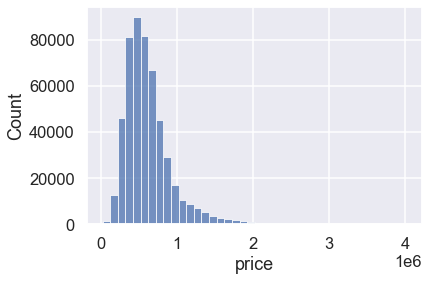

In [10]:
under_4m = sfh_all[sfh_all['price'] < 4_000_000]
sns.histplot(data=under_4m, x='price', binwidth=100000)

We can confirm that the sale price, even without the top 0.1%, remains highly skewed to the right, with a single mode around $1m. Next, we plot the histogram of the logarithm transformed sale price, which is roughly symmetric:

<AxesSubplot:xlabel='log_price', ylabel='Count'>

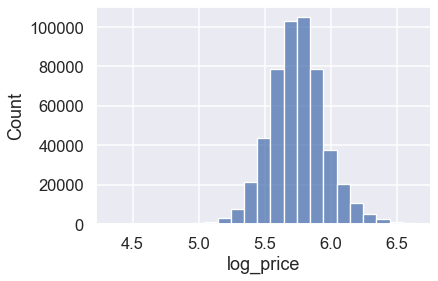

In [11]:
log_prices = under_4m.assign(log_price=np.log10(under_4m['price']))
sns.histplot(data=log_prices, x='log_price', binwidth=0.1)

## 10.5.2. What Next?

Now that we have an understanding of the distribution of sale price, let’s consider the so-what questions posed in the previous section. Why might the data shape matter? Do you have reason to expect that subgroups of the data have different distributions? What comparison might bring added value to the investigation?

An initial attempt to answer the first question is that models and statistics based on symmetric distributions tend to have more robust and stable properties than for highly skewed distributions. We address this issue more in the modeling sections of the book. For this reason, we primarily work with the log-transformed sale price. And, we might also choose to limit our analysis to sale prices under $6m since the super-expensive houses may behave quite differently.

To begin to answer the second and third questions, we turn to our knowledge of the housing market in this time period. Sale prices for houses rose rapidly in the mid ’00s, and then the bottom fell out of the market (Reference). For this reason, the distribution of sale price in, say, 2004, might be quite different than in 2008, right before the crash. To explore this further we can examine the behavior of prices over time. Or we can fix time, and examine the relationships between price and the other features of interest, essentially controlling for a time effect. Both approaches are potentially worthwhile, and we proceed with both.

Another factor to consider is location. You may have heard the expression: There are three things that matter in property: location, location, location. Comparing price across cities might bring added value to our investigation.

One approach to EDA is to narrow our focus. In this way we can control for particular features, such as time. We do this by first limiting the data to sales made in one calendar year, 2004, so rising prices should have a limited impact on the distributions and relationships that we examine. To limit the influence of the very expensive and large houses, we also restrict ourselves to sales below $4m and houses smaller than 12,000 ft^2. This subset still contains large and expensive houses, but not outrageously so. Later, we further restrict our exploration to a few cities of interest.

In [12]:
def subset(df):
    return df.loc[(df['price'] < 4_000_000) &
                  (df['bsqft'] < 12_000)]
sfh = sfh_all.pipe(subset)
sfh

,county,city,zip,street,...,bsqft,year,date,datesold
0,Alameda County,Alameda,94501.00,1001 Post Street,...,1982.00,1950.00,2004-08-29,NaN
1,Alameda County,Alameda,94501.00,1001 Santa Clara Avenue,...,3866.00,1995.00,2005-11-06,NaN
2,Alameda County,Alameda,94501.00,1001 Shoreline Drive \#102,...,1360.00,1970.00,2003-09-21,NaN
...,...,...,...,...,...,...,...,...,...
521484,Sonoma County,Windsor,95492.00,998 Polaris Drive,...,1196.00,1973.00,2007-08-05,NaN
521487,Sonoma County,Windsor,95492.00,9992 Wallace Way,...,1158.00,1993.00,2005-05-15,NaN
521490,Sonoma County,Windsor,95492.00,999 Gemini Drive,...,1092.00,1973.00,2003-09-21,NaN


For this subset, the shape of the distribution of sale price remains the same—price is still highly skewed to the right. We continue to work with this subset to address the question: Are there any potentially important features to create comparisons with/against?